In [1]:
import sys
sys.path.append("C:\\Università\\TimeSeriesUnivariate\\")
import network as n
import pandas as pd
import dataset as d
import torch
import time
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('.\\data\\london_weather.csv')
data = d.dataset_preproc(data)

batch_size = 64
epochs = 30
model = n.create_model(len(data.columns))
early_stop = n.EarlyStopping(5, 0.01)
window_size = 365

train, val = d.get_dataset(data, batch_size, window_size)
    
min_mse = 100000000000000
min_mae = 100000000000000
for epoch in range(epochs):
    print(f'------------Epoca numero {epoch+1}-------------')
    n.train_loop(model, train, batch_size)
    mse, mae= n.validation_loop(model, val)
    if min_mse > mse:
        model_sc = torch.jit.script(model)
        time.sleep(1)
        model_sc.save('.\\weights.pt')
        min_mse = mse
        min_mae = mae
    if early_stop(mse):
        break

    
print(f'Metriche sul validation finali:\nMSE: {min_mse} - MAE: {min_mae}')

c:\Users\rosil\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\serialization.py:1006: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


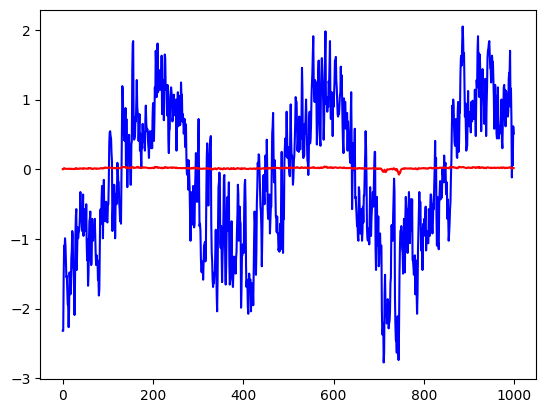

In [3]:
data = pd.read_csv('.\\data\\london_weather.csv')
data = d.dataset_preproc(data)
dataset = d.get_ordered_dataset(data, 365, 64)

model = torch.load('.\\weights.pt')

targets = np.array([])
for _,y in dataset:
    targets = np.append(targets, y)
    
predictions = n.test_loop(model, dataset)

plt.plot(targets[0:1000], c='b')
plt.plot(predictions[0:1000], c='r')
plt.show()